# COMP 472 - Mini Project 1

## Load dataset

Here we will be extracting and reading the JSON file into a Pandas DataFrame. We decided to use `pd.read_json()` rather than `json.load()` since DataFrames give us a more pleasant data type to work with.

In [1]:
import gzip
import json
import pandas as pd

# Read JSON file into Pandas DataFrame
f = gzip.open('goemotions.json.gz', 'rb')
df = pd.read_json(f)
df.columns = ['comment', 'emotion', 'sentiment']

# Close file
f.close()

Calling `DataFrame.head()` gives us a nice visual of our data.

In [2]:
df.head(10)

,comment,emotion,sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive
5,"He isn't as big, but he's still quite popular....",disapproval,negative
6,That's crazy; I went to a super [RELIGION] hig...,amusement,positive
7,that's adorable asf,amusement,positive
8,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",amusement,positive
9,"I have, and now that you mention it, I think t...",neutral,neutral


## Plotting Data

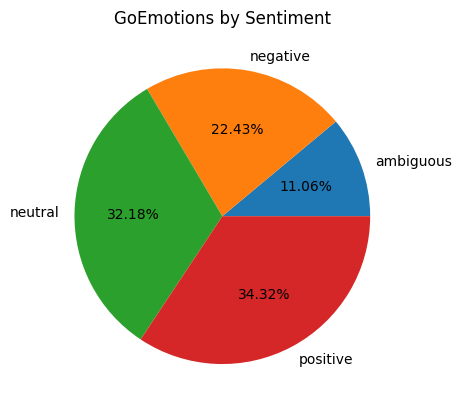

In [3]:
import matplotlib.pyplot as plt

sentiment = df.groupby(['sentiment'])['sentiment'].count()

plt.title('GoEmotions by Sentiment')
plt.pie(sentiment, labels = sentiment.index, autopct = '%1.2f%%')
plt.show()

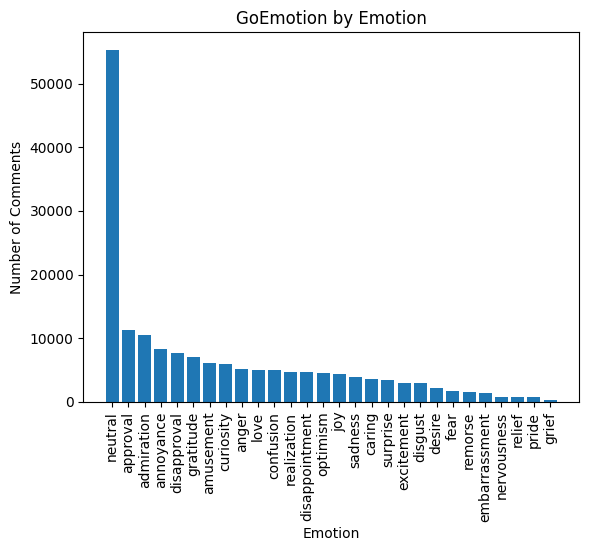

In [4]:
emotion = df.groupby(['emotion'])['emotion'].count().sort_values(ascending=False)

plt.bar(emotion.index, emotion)
plt.xticks(
    rotation=90, 
    fontweight='light',
)

plt.title('GoEmotion by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')

plt.show()

## Words as Features

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

comment_vector = vectorizer.fit_transform(df['comment'])
print(type(comment_vector))

<class 'scipy.sparse._csr.csr_matrix'>


In [6]:
vocab_size = comment_vector.shape[1]
print("Vocabulary size: " + str(vocab_size))

Vocabulary size: 30449


In [7]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(comment_vector, df, test_size=0.2)

#### Multinomial Naive bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB

#Emotion classifier
nb_classifier = MultinomialNB()
nb_emotion_model = nb_classifier.fit(x_train, y_train['emotion'])

In [9]:
v = vectorizer.transform(['Thank you!'])
nb_emotion_model.predict(v)

array(['gratitude'], dtype='<U14')

In [10]:
#Sentiment classifier
nb_sentiment_model = nb_classifier.fit(x_train, y_train['sentiment'])
v = vectorizer.transform(['Thank you!'])
nb_sentiment_model.predict(v)

array(['positive'], dtype='<U9')

##### Decision Tree

In [11]:
from sklearn import tree
from sklearn import preprocessing

#Emotion classifier
dtc_emotion_model = tree.DecisionTreeClassifier(criterion="entropy")
dtc_emotion_model.fit(x_train, y_train['emotion'])


#predictEmotionFromDT = dtc_emotion_model.predict(x_test[0:5])
#print(x_test[0:5])
#print(predictEmotionFromDT)

DecisionTreeClassifier(criterion='entropy')

In [12]:
#Sentiment classifier
dtc_sentiment_model = tree.DecisionTreeClassifier(criterion="entropy")
dtc_sentiment_model.fit(x_train, y_train['sentiment'])
#predictSentimentFromDT = dtc_sentiment_model.predict(x_test[0:5])
#print(predictSentimentFromDT)

DecisionTreeClassifier(criterion='entropy')

##### Multi-Layered Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

# Multi-Layered Perceptron classifier for emotion classification
mlpcClassifierEmotion = MLPClassifier(max_iter=10)
mlpcClassifierEmotion.fit(x_train, y_train['emotion'])

# Multi-Layered Perceptron classifier for sentiment classification
mlpcClassifierSentiment = MLPClassifier(max_iter=10)
mlpcClassifierSentiment.fit(x_train, y_train['sentiment'])
# mlpcClassifierEmotion.predict(x_test)
# mlpcClassifierEmotion.score(x_test, y_test['emotion'])

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
mlpcClassifierEmotion.predict(x_test)
print("emotion score: ", mlpcClassifierEmotion.score(x_test, y_test['emotion']))

mlpcClassifierSentiment.predict(x_test)
print("sentiment score: ",mlpcClassifierEmotion.score(x_test, y_test['sentiment']))

emotion score:  0.43950064020486557
sentiment score:  0.2586427656850192


## Performance

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

performanceFile = open("Performance.txt", "w")

##### Multinomial Naive Bayes

In [16]:
#Performance of emotion classifier
nb_emotion_model_prediction = nb_emotion_model.predict(x_test)
mnb_emotion_report = classification_report(y_test['emotion'], nb_emotion_model_prediction)
print(mnb_emotion_report)

# Confusion matrix
mnb_emotion_confusion_matrix = confusion_matrix(y_test['emotion'], nb_emotion_model_prediction)
print(mnb_emotion_confusion_matrix)

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

                precision    recall  f1-score   support

    admiration       0.00      0.00      0.00      2141
     ambiguous       0.00      0.00      0.00         0
     amusement       0.00      0.00      0.00      1234
         anger       0.00      0.00      0.00      1033
     annoyance       0.00      0.00      0.00      1680
      approval       0.00      0.00      0.00      2199
        caring       0.00      0.00      0.00       724
     confusion       0.00      0.00      0.00      1018
     curiosity       0.00      0.00      0.00      1175
        desire       0.00      0.00      0.00       437
disappointment       0.00      0.00      0.00       921
   disapproval       0.00      0.00      0.00      1530
       disgust       0.00      0.00      0.00       602
 embarrassment       0.00      0.00      0.00       283
    excitement       0.00      0.00      0.00       618
          fear       0.00      0.00      0.00       348
     gratitude       0.00      0.00      0.00  

In [17]:
#Performance of sentiment classifier
nb_sentiment_model_prediction = nb_sentiment_model.predict(x_test)
mnb_sentiment_report = classification_report(y_test['sentiment'], nb_sentiment_model_prediction)
print(mnb_sentiment_report)

# Confusion matrix
mnb_sentiment_confusion_matrix = confusion_matrix(y_test['sentiment'], nb_sentiment_model_prediction)
print(mnb_sentiment_confusion_matrix)

              precision    recall  f1-score   support

   ambiguous       0.43      0.23      0.30      3847
    negative       0.54      0.52      0.53      7662
     neutral       0.48      0.49      0.49     11077
    positive       0.62      0.71      0.66     11778

    accuracy                           0.54     34364
   macro avg       0.52      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364

[[ 894  646 1479  828]
 [ 282 3998 2141 1241]
 [ 632 1873 5405 3167]
 [ 288  938 2159 8393]]


##### Decision Tree

In [18]:
#Performance of emotion classifier

DT_emotion_model_prediction = dtc_emotion_model.predict(x_test)
DT_emotion_report = classification_report(y_test['emotion'], DT_emotion_model_prediction)
print(DT_emotion_report)

#Confusion matrix
DT_emotion_confusion_matrix = confusion_matrix(y_test['emotion'], DT_emotion_model_prediction)
print(DT_emotion_confusion_matrix)

                precision    recall  f1-score   support

    admiration       0.41      0.57      0.48      2141
     amusement       0.43      0.57      0.49      1234
         anger       0.25      0.39      0.30      1033
     annoyance       0.16      0.23      0.18      1680
      approval       0.20      0.28      0.23      2199
        caring       0.22      0.28      0.25       724
     confusion       0.24      0.29      0.26      1018
     curiosity       0.32      0.33      0.32      1175
        desire       0.23      0.27      0.25       437
disappointment       0.16      0.17      0.17       921
   disapproval       0.23      0.23      0.23      1530
       disgust       0.25      0.19      0.22       602
 embarrassment       0.18      0.17      0.18       283
    excitement       0.24      0.22      0.23       618
          fear       0.40      0.34      0.36       348
     gratitude       0.76      0.73      0.75      1414
         grief       0.11      0.09      0.10  

In [19]:
#Performance of sentiment classifier

DT_sentiment_model_prediction = dtc_sentiment_model.predict(x_test)
DT_sentiment_report = classification_report(y_test['sentiment'], DT_sentiment_model_prediction)
print(DT_sentiment_report)

#Confusion matrix
DT_sentiment_confusion_matrix = confusion_matrix(y_test['sentiment'], DT_sentiment_model_prediction)
print(DT_sentiment_confusion_matrix)

              precision    recall  f1-score   support

   ambiguous       0.35      0.46      0.40      3847
    negative       0.51      0.60      0.55      7662
     neutral       0.51      0.48      0.49     11077
    positive       0.70      0.60      0.65     11778

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.55     34364

[[1786  634  963  464]
 [ 821 4605 1514  722]
 [1565 2465 5277 1770]
 [ 877 1347 2515 7039]]


##### Multi-Layered Perceptron

In [20]:
performanceFile.write("Multi-layered Perceptron classifier for 'emotion'\n\n")

#Performance of emotion classifier
mlpcClassifierEmotion_model_prediction = mlpcClassifierEmotion.predict(x_test)
mlpcClassifierEmotion_report = classification_report(y_test['emotion'], mlpcClassifierEmotion_model_prediction)
performanceFile.write(mlpcClassifierEmotion_report)

#Confusion matrix
mlpcClassifierEmotion_confusion_matrix = confusion_matrix(y_test['emotion'], mlpcClassifierEmotion_model_prediction)
performanceFile.write(str(mlpcClassifierEmotion_confusion_matrix))

performanceFile.write("\n\nMulti-layered Perceptron classifier for 'sentiment'\n\n")

#Performance of sentiment classifier
mlpcClassifierSentiment_model_prediction = mlpcClassifierSentiment.predict(x_test)
mlpcClassifierSentiment_report = classification_report(y_test['sentiment'], mlpcClassifierSentiment_model_prediction)
performanceFile.write(mlpcClassifierSentiment_report)

#Confusion matrix
mlpcClassifierSentiment_confusion_matrix = confusion_matrix(y_test['sentiment'], mlpcClassifierSentiment_model_prediction)
performanceFile.write(str(mlpcClassifierSentiment_confusion_matrix))


performanceFile.close()

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                precision    recall  f1-score   support

    admiration       0.51      0.52      0.51      2141
     amusement       0.53      0.61      0.56      1234
         anger       0.39      0.26      0.31      1033
     annoyance       0.20      0.10      0.13      1680
      approval       0.37      0.08      0.14      2199
        caring       0.35      0.11      0.17       724
     confusion       0.44      0.10      0.17      1018
     curiosity       0.35      0.15      0.21      1175
        desire       0.46      0.22      0.30       437
disappointment       0.27      0.07      0.12       921
   disapproval       0.26      0.09      0.14      1530
       disgust       0.43      0.15      0.22       602
 embarrassment       0.34      0.08      0.13       283
    excitement       0.34      0.10      0.16       618
          fear       0.48      0.35      0.41       348
     gratitude       0.77      0.79      0.78      1414
         grief       0.00      0.00      0.00  

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[[1105   30    6    8   22    6    3   14    5    7    7    5    0   16
     4   45    0   51   92    0  642   18    0    4    0    0    8   43]
 [  32  747    5   17    4    1    4    4    1    3    5    2    1    3
     1    7    0   25   14    0  328    4    0    2    0    5    4   15]
 [  10   15  269  100    8    6    2    9    1    0   17   12    0    2
     6    4    0    0    7    0  550    8    0    1    0    3    1    2]
 [  30   52   83  169   13    7    5   17    2   14   43   22    7    4
     8   26    0    5   18    0 1117    7    0    3    0    2   12   14]
 [ 120   38   12   34  184   19    5   13    4   12   34    5    1   11
     8   25    0   26   42    1 1537   36    0    6    0   10   10    6]
 [  28    9    5   11   10   79    1    6    7    2   10    1    1    1
     7   13    0   17   11    0  455   31    0    1    0    8    9    1]
 [  18   16   16   15   18    1  105   55    0    2   19    1    0    3
     5    4    0    5    7    0  706    3    0    3    0  

## Exploration: different splits of training & test sets

##### Multinomial Naive bayes

In [21]:
#50% train, 50% test
nb_xTrain, nb_xtest, nb_yTrain, nb_yTest = train_test_split(comment_vector, df, test_size=0.5)

#Emotion classifier
nb_emotion_model2 = nb_classifier.fit(nb_xTrain, nb_yTrain['emotion'])

#Sentiment classifier
nb_sentiment_model2 =  nb_classifier.fit(nb_xTrain, nb_yTrain['sentiment'])

##### Decision Trees

In [22]:
#40% train, 60% test
DT_xTrain, DT_xtest, DT_yTrain, DT_yTest = train_test_split(comment_vector, df, test_size=0.6)

#Emotion classifier
dtc_emotion_model2 = tree.DecisionTreeClassifier(criterion = "entropy")
dtc_emotion_model2.fit(DT_xTrain, DT_yTrain['emotion'])


#Sentiment classifier
dtc_sentiment_model2 = tree.DecisionTreeClassifier(criterion = "entropy")
dtc_sentiment_model2.fit(DT_xTrain, DT_yTrain['sentiment'])


DecisionTreeClassifier(criterion='entropy')

##### Multi-Layered Perceptron

In [26]:
#20%treain, 80% test
mlp_xTrain, mlp_xtest, mlp_yTrain, mlp_yTest = train_test_split(comment_vector, df, test_size=0.8)

#Emotion classifier
mlp_emotion_model2 = MLPClassifier(max_iter=10)
mlp_emotion_model2.fit(mlp_xTrain, mlp_yTrain['emotion'])

#Sentiment classifier
mlp_sentiment_model2 = MLPClassifier(max_iter=10)
mlp_sentiment_model2.fit(mlp_xTrain, mlp_yTrain['sentiment'])

C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\calch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10)